<a href="https://colab.research.google.com/github/M-LABEEB/rhombixtechnologies_tasks/blob/main/Task1_TitanicSurvivalPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="darkgrid")
df = pd.read_csv('train.csv')
df.head()


In [ ]:
df.info() # Checking basic info
df.isnull().sum() # Checking for missing values

df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


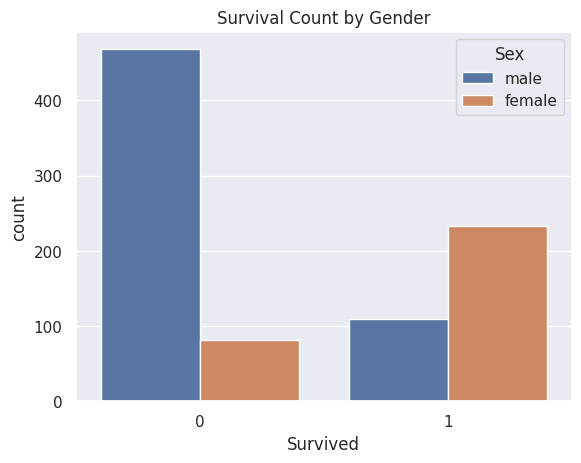

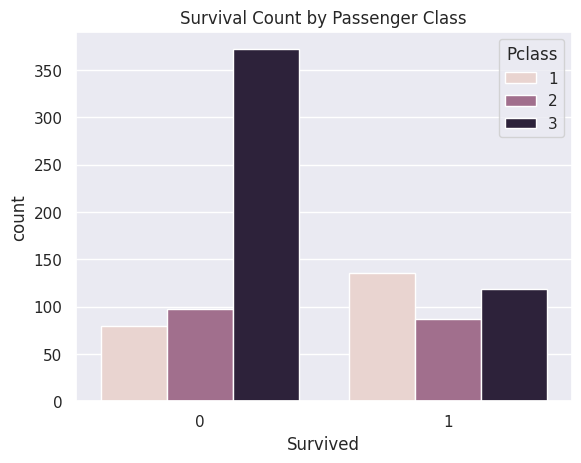

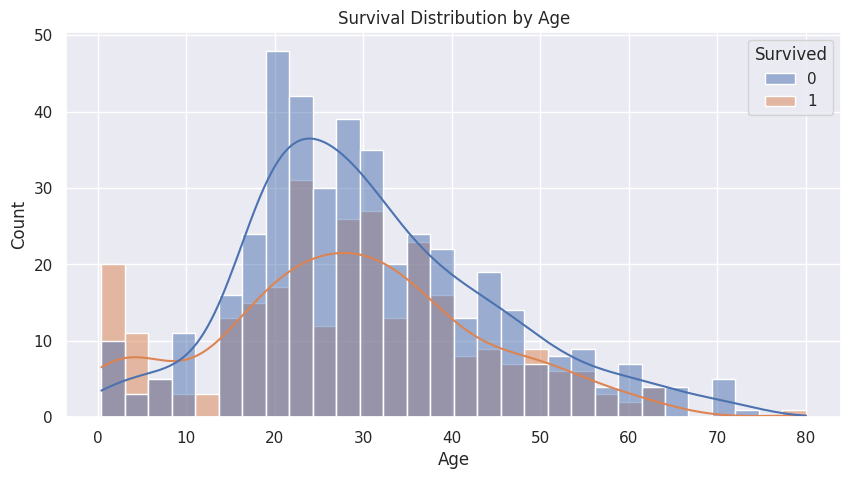

In [ ]:
# Survival by Gender
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title("Survival Count by Gender")
plt.show()

# Survival by Passenger Class
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title("Survival Count by Passenger Class")
plt.show()

# Age distribution of survivors vs non-survivors
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True)
plt.title("Survival Distribution by Age")
plt.show()


In [ ]:
# Fill missing Age values with the median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing Embarked with the most common value
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Droping those columns we won't use
df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)

# Convert categorical columns to numeric using mapping
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


df.isnull().sum()


,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df.drop('Survived', axis=1)
y = df['Survived']

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Check accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

print(classification_report(y_test, y_pred))


Model Accuracy: 0.83
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.76      0.78        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [ ]:
def predict_survival(pclass, sex, age, fare, embarked):

    sex = 0 if sex.lower() == 'male' else 1
    embarked_map = {'s': 0, 'c': 1, 'q': 2}
    embarked = embarked_map.get(embarked.lower(), 0)

    input_data = pd.DataFrame([{
        'Pclass': pclass,
        'Sex': sex,
        'Age': age,
        'SibSp': 0,
        'Parch': 0,
        'Fare': fare,
        'Embarked': embarked
    }])

    prediction = model.predict(input_data)

    return "Survived 🛟" if prediction[0] == 1 else "Not Survived 💀"




In [ ]:
    predict_survival(1, 'female', 25, 100, 'S')

'Survived 🛟'

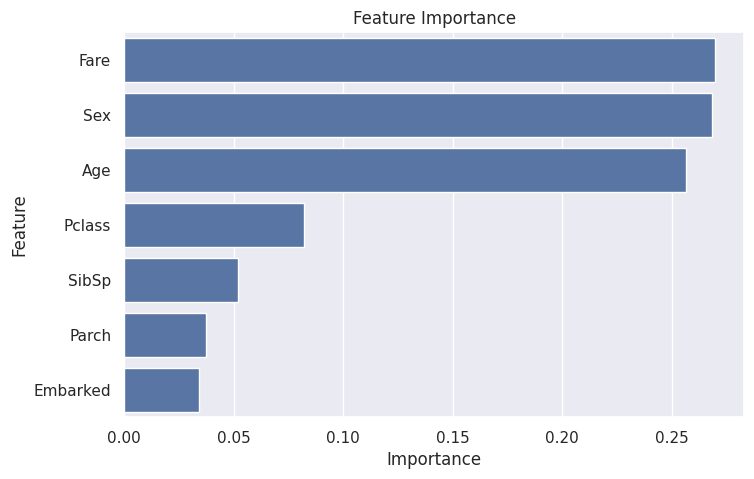

In [ ]:
# Get feature importances from Random Forest model
importances = model.feature_importances_
features = X.columns

# Creating a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importance")
plt.show()
